# Lab 7- Deep Learning Model

This lab is meant to get you started in using Keras to design Deep Neural Networks. The goal here is to simply repeat your previous lab, but with DNNs.

Let's start with reading the data, like before:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

filename="SUSY.csv"
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi","MET", "MET_phi", "MET_rel", "axial_MET"]
FeatureNames=["M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

df = pd.read_csv(filename, dtype='float64', names=VarNames)

Now lets define training and test samples. Note that DNNs take very long to train, so for testing purposes we will use only about 10% of the 5 million events in the training/validation sample. Once you get everything working, make the final version of your plots with the full sample. 

Also note that Keras had trouble with the Pandas tensors, so after doing all of the nice manipulation that Pandas enables, we convert the Tensor to a regular numpy tensor.

In [2]:
N_Max=550000
N_Train=500000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:N_Max]

X_Train=np.array(Train_Sample[VarNames[1:]])
y_Train=np.array(Train_Sample["signal"])

X_Test=np.array(Test_Sample[VarNames[1:]])
y_Test=np.array(Test_Sample["signal"])


## Exercise 7.1

You will need to create several models and make sure they are properly trained. Write a function that takes this history and plots the values versus epoch. For every model that you train in the remainder of this lab, assess:

* Has you model's performance plateaued? If not train for more epochs. 
* Compare the performance on training versus test sample. Are you over training?

In [5]:
from keras.models import Model
from keras.layers import Dense, Input

in_x = Input(shape = X_Train.shape[1:])
x = Dense(12, input_dim=X_Train.shape[1], activation='relu')(in_x)
x = Dense(8, activation='relu')(x)
x = Dense(8, activation='relu')(x)
out_x = Dense(1, activation='sigmoid')(x)

model = Model(in_x,out_x)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 18)]              0         
                                                                 
 dense_4 (Dense)             (None, 12)                228       
                                                                 
 dense_5 (Dense)             (None, 8)                 104       
                                                                 
 dense_6 (Dense)             (None, 8)                 72        
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 413
Trainable params: 413
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
def history_epoc_plot():
    history=model.fit(X_Train, y_Train, validation_data=(X_Test,y_Test), 
                      epochs=10, batch_size=2048)
    print (history.history)
    plt.plot(range(len(history.history["loss"])),history.history["loss"],label="Training Loss")
    plt.plot(range(len(history.history["val_loss"])),history.history["val_loss"],label="Validation Loss")
    plt.legend()

Epoch 1/10
245/245 [==============================] - 1s 2ms/step - loss: 0.5376 - accuracy: 0.7354 - val_loss: 0.4639 - val_accuracy: 0.7845
Epoch 2/10
245/245 [==============================] - 0s 2ms/step - loss: 0.4539 - accuracy: 0.7901 - val_loss: 0.4526 - val_accuracy: 0.7899
Epoch 3/10
245/245 [==============================] - 0s 2ms/step - loss: 0.4467 - accuracy: 0.7941 - val_loss: 0.4475 - val_accuracy: 0.7927
Epoch 4/10
245/245 [==============================] - 0s 2ms/step - loss: 0.4426 - accuracy: 0.7958 - val_loss: 0.4447 - val_accuracy: 0.7935
Epoch 5/10
245/245 [==============================] - 0s 2ms/step - loss: 0.4399 - accuracy: 0.7975 - val_loss: 0.4422 - val_accuracy: 0.7950
Epoch 6/10
245/245 [==============================] - 0s 2ms/step - loss: 0.4382 - accuracy: 0.7979 - val_loss: 0.4409 - val_accuracy: 0.7950
Epoch 7/10
245/245 [==============================] - 0s 2ms/step - loss: 0.4372 - accuracy: 0.7985 - val_loss: 0.4392 - val_accuracy: 0.7962
Epoch 

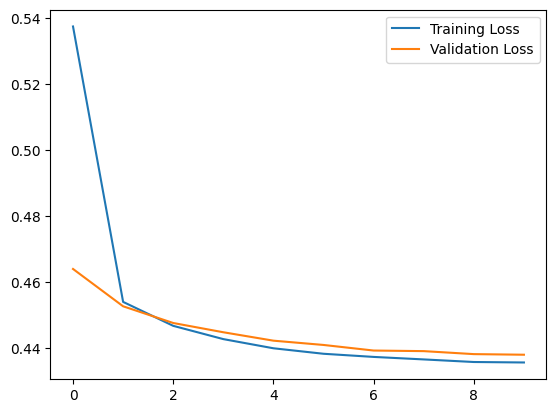

In [11]:
history_epoc_plot()

## Exercise 7.2

Following the original paper (see lab 5), make a comparison of the performance (using ROC curves and AUC) between models trained with raw, features, and raw+features data.

In [12]:
scores = model.evaluate(X_Test, y_Test)
print(scores)

1563/1563 [==============================] - 1s 825us/step - loss: 0.4379 - accuracy: 0.7968
[0.43790432810783386, 0.7968199849128723]


In [13]:
model.predict(X_Test)

1563/1563 [==============================] - 1s 707us/step


array([[0.7798221 ],
       [0.11814414],
       [0.12514527],
       ...,
       [0.5322935 ],
       [0.3391607 ],
       [0.19385895]], dtype=float32)

1563/1563 [==============================] - 1s 710us/step


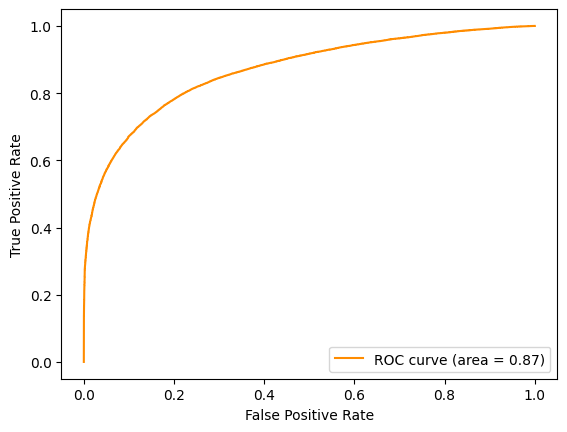

In [14]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_Test, model.predict(X_Test))
                        
roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

## Exercise 7.3

Design and implement at least 3 different DNN models. Train them and compare performance. You may try different architectures, loss functions, and optimizers to see if there is an effect.

## Exercise 7.4

Repeat exercise 4 from Lab 6, adding your best performing DNN as one of the models.  
